In [35]:
import pandas as pd
import numpy as np
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import matplotlib.pyplot as plt
import utils

features = utils.load('fma_metadata/data/fma_metadata/features.csv') 
genres = utils.load('fma_metadata/data/fma_metadata/genres.csv')
tracks = utils.load('fma_metadata/data/fma_metadata/tracks.csv')
echonest = utils.load('fma_metadata/data/fma_metadata/echonest.csv')

#print('{} top-level genres'.format(len(genres['top_level'].unique())))
#genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           1.481593  2.691455  0.866868  1.341231  1.347792  1.237658   
3           1.366848  1.054094  0.108103  0.619185  1.038253  1.292235   
5          -0.923192 -0.927232  0.666617  1.038546  0.268932  1.125141   
10          1.770694  1.604566  0.521217  1.982386  4.326824  1.300406   
20         -0.289294 -0.816410  0.043851 -0.804761 -0.990958 -0.430381   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.692500  0.569344  0.597041  0.625864  0.567330  0.443949   
3           0.677641  0.584248  0.581271  0.581182  0.454241  0.464841   
5           0.611014  0.651471  0.494528  0.448799  0.468624  0.454021   
10          0.461840  0.540411  0.446708  0.647553  0.591908  0.513306   
20          0.652864  0.676290  0.670288  0.598666  0.653607  0.697645   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.487976  0.497327  0.574435  0.579241  0.620102  0.586945   
3           0.542833  0.664720  0.511329  0.530998  0.603398  0.547428   
5           0.497172  0.559755  0.671287  0.610565  0.551663  0.603413   
10          0.651501  0.516887  0.511479  0.478263  0.638766  0.638495   
20          0.664929  0.686563  0.635117  0.667393  0.689589  0.683196   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.474300  0.369816  0.236119  0.228068  0.222830  0.221415   
3           0.232784  0.229469  0.225674  0.216713  0.220512  0.242744   
5           0.258420  0.303385  0.250737  0.218562  0.245743  0.236018   
10          0.229882  0.286978  0.240096  0.226792  0.192443  0.288410   
20          0.202806  0.245125  0.262997  0.187961  0.182397  0.238173   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.229238  0.248795  0.196245  0.175809  0.200713  0.319972   
3           0.369235  0.420716  0.312129  0.242748  0.264292  0.225683   
5           0.275766  0.293982  0.346324  0.289821  0.246368  0.220939   
10          0.413348  0.349137  0.268424  0.243144  0.268941  0.236763   
20          0.278600  0.292905  0.247150  0.292501  0.3

In [39]:
genres.head()

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5


In [5]:
compressed_features = pd.DataFrame(skl.decomposition.PCA(n_components=1).fit_transform(features.loc[small , 'mfcc']))

for x in features.columns.levels[0]:
        compressed_features[x] = skl.decomposition.PCA(n_components=1).fit_transform(features.loc[small , x])
# for x in features.columns.levels[0]:
#         print(x)
compressed_features.drop(0, axis=1, inplace=True)
compressed_features.head()


,chroma_cens,chroma_cqt,chroma_stft,mfcc,rmse,spectral_bandwidth,spectral_centroid,spectral_contrast,spectral_rolloff,tonnetz,zcr
0,1.087264,-0.841954,-0.565135,-93.924253,1.074865,244.719264,62.757234,-14.392589,1327.632996,1.449442,-25.852672
1,-0.377099,-0.579964,-0.578177,-5.467157,-1.348527,168.639642,14.593599,-12.422014,801.141162,7.713286,-24.800177
2,3.091406,0.026566,1.312020,-111.985279,0.322551,-51.656158,-82.649364,-8.358257,125.505390,0.809858,-10.135438
3,-1.556062,-1.392952,0.111283,13.106209,-1.353019,94.065054,930.001559,-0.129345,103.552543,-0.158172,-20.524756
4,-1.761146,-0.852443,2.124934,78.081377,-0.553165,-338.432200,272.111857,6.896948,-689.388222,-0.803023,1.441258


No handles with labels found to put in legend.


(106574,) (106574,)


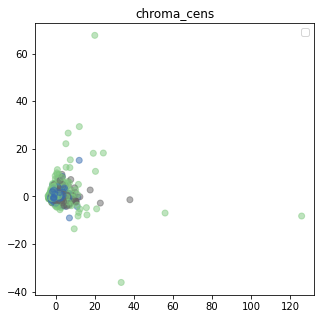

No handles with labels found to put in legend.


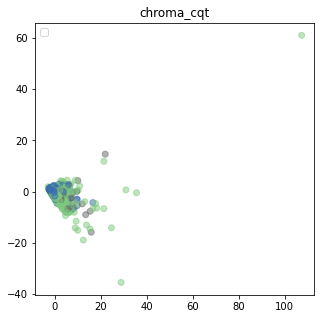

No handles with labels found to put in legend.


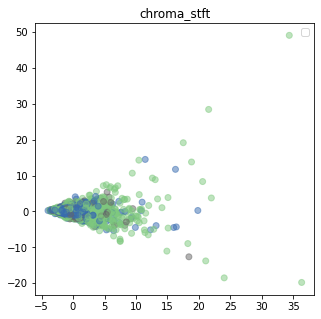

No handles with labels found to put in legend.


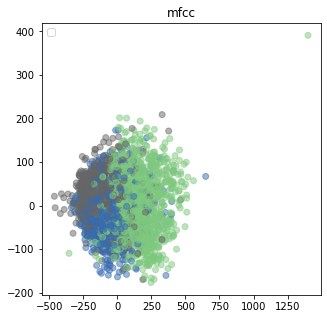

No handles with labels found to put in legend.


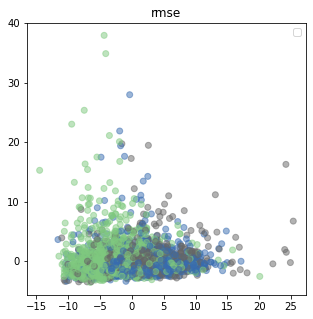

No handles with labels found to put in legend.


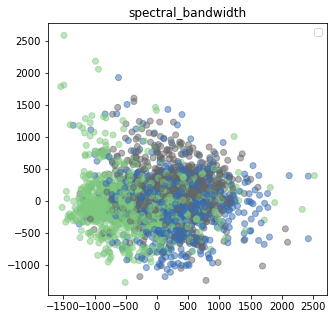

No handles with labels found to put in legend.


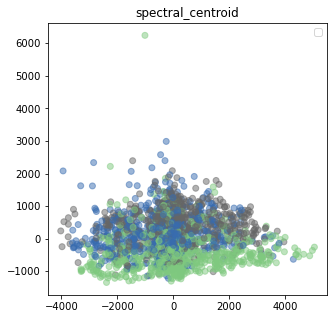

No handles with labels found to put in legend.


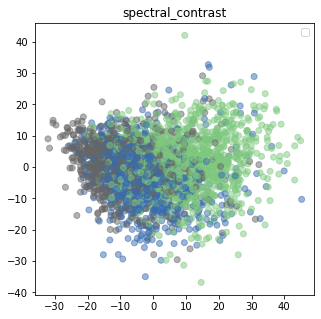

No handles with labels found to put in legend.


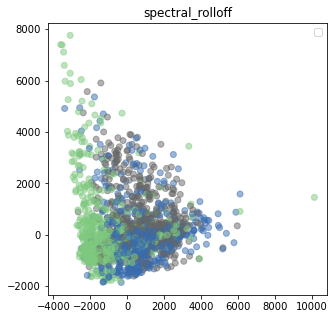

No handles with labels found to put in legend.


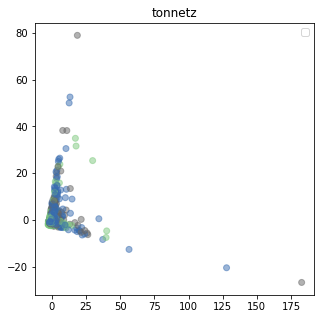

No handles with labels found to put in legend.


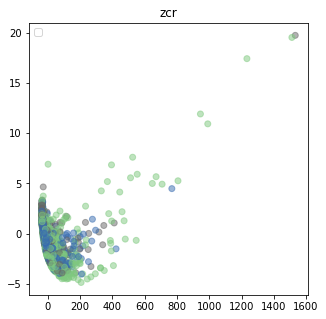

In [34]:

genre1 = tracks['track', 'genre_top'] == 'Rock'
genre2 = tracks['track', 'genre_top'] == 'Country'
genre3 = tracks['track', 'genre_top'] == 'Instrumental'
genre4 = tracks['track', 'genre_top'] == 'Hip-hop'
genre5 = tracks['track', 'genre_top'] == 'Pop'
small = tracks['set', 'subset'] <= 'small'

print(small.shape, genre1.shape)
for col in features.columns.levels[0]:
        X = features.loc[small & (genre1|genre2|genre3|genre4|genre5), col]

        X = skl.decomposition.PCA(n_components=2).fit_transform(X)

        y = tracks.loc[small & (genre1|genre2|genre3|genre4|genre5), ('track', 'genre_top')]
        y = skl.preprocessing.LabelEncoder().fit_transform(y)

        fig = plt.figure( figsize= (5,5))
        plt.scatter(X[:,0], X[:,1], c=y, cmap='Accent', alpha=0.5)
        plt.title(col)
        plt.legend()
        plt.show()
        X.shape, y.shape

In [28]:
list = tracks['track', 'genre_top'].unique()
print(list)

['Hip-Hop', 'Pop', NaN, 'Rock', 'Experimental', ..., 'Country', 'Classical', 'Old-Time / Historic', 'Instrumental', 'Easy Listening']
Length: 17
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']
